In [20]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle

%matplotlib inline  

In [21]:
# The number of days of historical data to download
delta = 200

# The symbols to be downloaded
symbols = ['ABB.BO', 'AMBALALSA.BO', 'HDFC.BO', 'ANDHRAPET.BO', 'APPLEFIN.BO', 'ASIANHOTNR.BO', 'ATUL.BO', 'AUTORIDFIN.BO', 'BAJAJELEC.BO', 'BAJAJHIND.BO', 'BAJFINANCE.BO', 'BALRAMCHIN.BO', 'BANARISUG.BO', 'BASF.BO', 'BATAINDIA.BO', 'BEML.BO', 'BEL.BO', 'BEPL.BO', 'BINANIIND.BO', 'BIRLACABLE.BO', 'BLUESTARCO.BO', 'DISAQ.BO', 'BNKCAP.BO', 'BPL.BO', 'CENTEXT.BO', 'CESC.BO', 'CIPLA.BO', 'DICIND.BO', 'CRISIL.BO', 'CGPOWER.BO', 'DABUR.BO', 'DALMIASUG.BO', 'ARVIND.BO', 'BHEL.BO', 'HINDPETRO.BO', 'IFCI.BO', 'MTNL.BO', 'CHENNPETRO.BO', 'RELCAPITAL.BO', 'SBIN.BO', 'IDBI.BO', 'DCW.BO', 'DHAMPURSUG.BO', 'ELANTAS.BO', 'DRREDDY.BO', 'EIDPARRY.BO', 'MERCK.BO', 'ESABINDIA.BO', 'ESTER.BO', 'FEDDERLOYD.BO', 'FGP.BO', 'FINCABLES.BO', 'CMIFPE.BO', 'FOSECOIND.BO', 'GOLDENTOBC.BO', 'GANESHBE.BO', 'GARDENSILK.BO', 'GTL.BO', 'PARRYSUGAR.BO', 'GODFRYPHLP.BO', 'GODREJIND.BO', 'KANSAINER.BO', 'GTNINDS.BO', 'GHCL*.BO', 'GUJFLUORO.BO', 'GLFL.BO', 'HCL-INSYS.BO', 'HDFCBANK.BO', 'HEROMOTOCO.BO', 'HFCL.BO', 'HSCL.BO', 'HINDZINC.BO', 'HMT.BO', 'PRAGBOS.BO', 'HOTELEELA.BO', 'IGPL.BO', 'INDIAGLYCO.BO', 'INDLEASE.BO', 'MARGOFIN.BO', 'INDORAMA.BO', 'INGERRAND.BO', 'INSILCO.BO', 'IFSL.BO', 'ITHL.BO', 'IONEXCHANG.BO', 'ATFL.BO', 'JISLJALEQS.BO', 'JASCH.BO', 'JCTLTD.BO', 'JINDALPOLY.BO', 'UMANGDAIR.BO', 'KAJARIACER.BO', 'WHIRLPOOL.BO', 'KGDENIM.BO', 'KINETICENG.BO', 'KIRLOSBROS.BO', 'KIRLOSIND.BO', 'ENVAIREL.BO', 'KOTAKBANK.BO', 'MAVIIND.BO', 'KSBPUMPS.BO', 'TRENT.BO', 'LAXMIMACH.BO', 'LICHSGFIN.BO', 'LML.BO', 'LUPIN.BO', 'LYKALABS.BO', 'MAFATIND.BO', 'MAHSCOOTER.BO', 'MAJESAUT.BO', 'MANALIPETC.BO', 'MFSL.BO', 'MIDINDIA.BO', 'MIRCELECTR.BO', 'CENTENKA.BO', 'LORDSCHLO.BO', 'SPICEJET.BO', 'MOREPENLAB.BO', 'NAHARSPING.BO', 'NATPEROX.BO', 'NEPCMICON.BO', 'PEL.BO', 'ABIRLANUVO.BO', 'NIITLTD.BO', 'JAYKAY.BO', 'NIRLON.BO', 'ORIENTHOT.BO', 'ORIENTBANK.BO', 'OSWALAGRO.BO', 'INDSUCR.BO', 'PILITA.BO', 'RAYMOND.BO', 'PIDILITIND.BO', 'PRIMESECU.BO', 'RAIN.BO', 'PUNJCOMMU.BO', 'RSWM.BO', 'RALLIS.BO', 'RAMAPETRO.BO', 'RAPICUT.BO', 'RUCHISOYA.BO', 'SAMTELIN.BO', 'SAMTEL.BO', 'RELINFRA.BO', 'SOLCT.BO', 'TATAPOWER.BO', 'SUPPETRO.BO', 'TATAELXSI.BO', 'THERMAX.BO', 'TIRUMALCHM.BO', 'THOMASCOOK.BO', 'TOKYOPLAST.BO', 'TORNTPHARM.BO', 'TRANSCHEM.BO', 'UTLINDS.BO', 'VHL.BO', 'HINDALCO.BO', 'HOCL.BO', 'MPILCORPL.BO', 'KORE.BO', 'FEDERALBNK.BO', 'SKFINDIA.BO', 'ASHOKLEY.BO', 'CUMMINSIND.BO', 'TATACOMM.BO', 'ABBOTINDIA.BO', 'BHARATFORG.BO', 'ESCORTS.BO', 'PREMIER.BO', 'BPCL.BO', 'SIEMENS.BO', 'TATAMOTORS.BO', 'GESHIP.BO', 'EXCELINDUS.BO', 'GARWARPOLY.BO', 'GLAXO.BO', 'NOVARTIND.BO', 'SANOFI.BO', 'GSKCONS.BO', 'PFIZER.BO', 'HINDUNILVR.BO', 'AKZOINDIA.BO', 'NOCIL.BO', 'TATACHEM.BO', 'TNPETRO.BO', 'ZUARIGLOB.BO', 'NESTLEIND.BO', 'ASIANPAINT.BO', 'BRITANNIA.BO', 'COLPAL.BO', 'EIHOTEL.BO', 'INDHOTEL.BO', 'ITC.BO', 'FINOLEXIND.BO', 'VALUEIND.BO', 'SUNRINV.BO', 'PEOPLIN.BO', 'DSINVEST.BO', 'CENTRUM.BO', 'KARTKIN.BO', 'ROSEI.BO', 'OSCAR.BO', 'TCIFINANCE.BO', 'ZCHANAIN.BO', 'IITL.BO', 'TATAINVEST.BO', 'RAPIDIN.BO', 'WALCHPF.BO', 'TECHNVISN.BO', 'SHAILY.BO', 'GREAVESCOT.BO', 'INDIANVSH.BO', 'CENTPROV.BO', 'CHOWGULSTM.BO', 'GLOBOFFS.BO', 'DHENUBUILD.BO', 'ASSOSTNB.BO', 'BOROSIL.BO', 'MARATHR.BO', 'RASSIREF.BO', 'TRIVENIGQ.BO', 'CITADEL.BO', 'RELSIND.BO', 'SINTEX.BO', 'BLUBLND-B.BO', 'DCM.BO', 'ZGAEKWAR.BO', 'HPCOTTON.BO', 'KATRSPG.BO', 'KESORAMIND.BO', 'LAKSHMIMIL.BO', 'VTL.BO', 'MALWACOTT.BO', 'PENINLAND.BO', 'PHOENIXLTD.BO', 'MARATHON.BO', 'RAJABAH.BO', 'RELCHEMQ.BO', 'RUBYMILLS.BO', 'SHREERAM.BO', 'SIMPLXREA.BO', 'SWANENERGY.BO', 'VICTMILL.BO', 'KSHITIJ.BO', 'SALSAIN.BO', 'INDSOYA.BO', 'SW1.BO', 'KKFIN.BO', 'UNIJOLL.BO', 'WAGEND.BO', 'ELCIDIN.BO', 'HEALINV.BO', 'BANSWRAS.BO', 'MODIPON.BO', 'SHRIDINE.BO', 'SRF.BO', 'SIYSIL.BO', 'SWADPOL.BO', 'BIRLATR.BO', 'SHRAJSYNQ.BO', 'SHRMFGC.BO', 'HINDSYNTEX.BO', 'ZSATYASL.BO', 'BBL.BO', 'ELPROINTL.BO', 'EMCO.BO', 'GEE.BO', 'HIRECT.BO', 'NIPPOBATRY.BO', 'JYOTI.BO', 'JSLINDL.BO', 'KAYCEEI.BO', 'INDOKEM.BO', 'PANAENERG.BO', 'NELCO.BO', 'PERMAGN.BO', 'HIGHENE.BO', 'STDBAT.BO', 'UNIVCABLES.BO', 'WSIND.BO', 'DLTNCBL.BO', 'DELTRON.BO', 'LAKSELEC.BO', 'KHAITANELE.BO', 'TUMUSEL.BO', 'DELTAMAGNT.BO', 'CONFINT.BO', 'RIDHISYN.BO', 'AVTIL.BO', 'KRISHNA.BO', 'GANHOLD.BO', 'UNIVPRIM.BO', 'HINDWRS.BO', 'INLCM.BO', 'INFORTEC.BO', 'ORIENTABRA.BO', 'STOVACQ.BO', 'ZWELCAST.BO', 'ATLASCYCLE.BO', 'SCOOTER.BO', 'SMLISUZU.BO', 'TIL.BO', 'EICHERMOT.BO', 'ALFREDHE.BO', 'CIMMCO.BO', 'DYNAMATECH.BO', 'GGDANDE.BO', 'GMM.BO', 'KIRLPNU.BO', 'TULIVE.BO', 'LXMIATO.BO', 'MANUGRAPH.BO', 'MIRCH.BO', 'MONOT.BO', 'NESCO.BO', 'INTEGRAEN.BO', 'REVATHI.BO', 'WENDT.BO', 'AXONVL.BO', 'RESPONIND.BO', 'SHYMINV.BO', 'DOLAT.BO', 'PRISMINFO.BO', 'WESTLIFE.BO', 'IMCFINA.BO', 'GOLDCORP.BO', 'WWTECHHOL.BO', 'MULTIIN.BO', 'SKYLMILAR.BO', 'ABCBEARS.BO', 'ELECON.BO', 'DECANBRG.BO', 'HERCULES.BO', 'IFBIND.BO', 'SINGER.BO', 'INTLCOMBQ.BO', 'JOSTS.BO', 'FAGBEARING.BO', 'MPCOSEMB.BO', 'ROLCOEN.BO', 'SNL.BO', 'JAIPAN.BO', 'MANCREDIT.BO', 'TRF.BO', 'WPIL.BO', 'KENNAMET.BO', 'HINDUJAFO.BO', 'SUDAI.BO', 'BHRKALM.BO', 'ARSHIYA.BO', 'GRINDWELL.BO', 'STANROS.BO', 'GENESYS.BO', 'PARNAXLAB.BO', 'INTELLCAP.BO', 'VYAPAR.BO', 'VIVIDHA.BO', 'ASISL.BO', 'TERRAFORM.BO', 'APIS.BO', 'ZSARVAMA.BO', 'ASL.BO', 'BLISSGVS.BO', 'INEOSSTYRO.BO', 'ALEMBICLTD.BO', 'ANUHPHR.BO', 'MODISNME.BO', 'BAYERCROP.BO', 'SASHWAT.BO', 'BORAX.BO', 'CHEMOPH.BO', 'CLNINDIA.BO', 'COROMANDEL.BO', 'DEEPAKNI.BO', 'DHARAMSI.BO', 'DIL.BO', 'JAYCH.BO', 'JLMORI.BO', 'KELENRG.BO', 'NITTAGELA.BO', 'MPAGI.BO', 'PHILIPCARB.BO', 'AMAL.BO', 'POLYCHEM.BO', 'PUNJABCHEM.BO', 'GUJCMDS.BO', 'SADHNANIQ.BO', 'SUDARSCHEM.BO', 'TRANSPEK.BO', 'UNICHEMLAB.BO', 'ZANDUREALT.BO', 'MYSORPETRO.BO', 'ALKYLAMINE.BO', 'ASTRAZEN.BO', 'TANFACIND.BO', 'MASCH.BO', 'SHREEJAL.BO', 'GUJTHEM.BO', 'CHEMFALKAL.BO', 'JAYSYN.BO', 'MAKERSL.BO', 'CONTCHM.BO', 'IGLFXPL-B.BO', 'ADVPETR-B.BO', 'RAJSPTR.BO', 'BLUECHIPT.BO', 'NOBLEXP.BO', 'KESARENT.BO', 'OUDHSUG.BO', 'APTEAML.BO', 'RAVALSUGAR.BO', 'SAKHTISUG.BO', 'THIRUSUGAR.BO', 'UBHOLDINGS.BO', 'CAPRO.BO', 'RANASUG.BO', 'RIGASUG.BO', 'CJGEL.BO', 'AMRITCORP.BO', 'IVP.BO', 'KLRF.BO', 'OLYOI.BO', 'MLKFOOD.BO', 'POLSON.BO', 'RASOI.BO', 'RATNAMAGRO.BO', 'SAGRSOY-B.BO', 'ORIBEVER.BO', 'DHANUKA.BO', 'TTKHEALTH.BO', 'LIMECHM.BO', 'JAGSNPHARM.BO', 'NOL.BO', 'GILLETTE.BO', 'COMPUPN.BO', 'MCCHRLS-B.BO', 'PIONRINV.BO', 'ASHNOOR.BO', 'UNITECH.BO', 'DHRUVES.BO', 'SCHABLON.BO', 'FIBERWEB.BO', 'LKPFIN.BO', 'EASTBUILD.BO', 'MNPLFIN.BO', 'BAJAJST.BO', 'KEYCORP.BO', 'GUJHOTE.BO', 'RAJATH.BO', 'PARMCOS-B.BO', 'JINDHOT.BO', 'SERIND.BO', 'HAWKINCOOK.BO', 'BESTEAST.BO', 'COSMOFILMS.BO', 'NEWMKTADV.BO', 'APOLLOHOSP.BO', 'NITINCAST.BO', 'ZENCAP.BO', 'SMIFS.BO', 'GREYCELLS.BO', 'MSRINDIA.BO', 'JOYREALTY.BO', 'AYMSYNTEX.BO', 'BLCISER.BO', 'PANCARBON.BO', 'FINKURVE.BO', 'SHRICON.BO', 'FRONTCAP.BO', 'NAVNETEDUL.BO', 'KEDIACN.BO', 'SATRAPROP.BO', 'TRANOCE.BO', 'THAKRAL.BO', 'RUCHINFRA.BO', 'VJTFEDU.BO', 'NETLINK.BO', 'ZLEENCON.BO', 'LANCORHOL.BO', 'BANASFN.BO', 'INFOMEDIA.BO', 'GUFICBIO.BO', 'PHOTON.BO', 'OSWALEA.BO', 'BENARAS.BO', 'BHAGWOX.BO', 'BOMOXY-B1.BO', 'BERGEPAINT.BO', 'CAPRIHANS.BO', 'GRAPHITE.BO', 'EMPIND.BO', 'GRAVISSHO.BO', 'GARWALLROP.BO', 'GARWAMAR.BO', 'GOACARBON.BO', 'HEG.BO', 'ZHINDHSG.BO', 'INDIANCARD.BO', 'INTLCONV.BO', 'OSEASPR.BO', 'PREMSYN.BO', 'SHAHCON.BO', 'SHALPAINTS.BO', 'SINNAR.BO', 'HINDMILL.BO', 'ZSOUTGAS.BO', 'TECHCON.BO', 'SUPREMEIND.BO', 'TRADWIN.BO', 'VSTIND.BO', 'MADHUSE.BO', 'YAMNINV.BO', 'ZARCOLEA.BO', 'JUMBFNL.BO', 'SAKTHIFIN.BO', 'DHFL.BO', 'WEIZFIN.BO', 'TVOLCON.BO', 'SHIVTEX.BO', 'VBDESAI.BO', 'QUADRANT.BO', '1STCUS.BO', 'KAMANWALA.BO', 'KOTHARIFIN.BO', 'BAJRFIN.BO', 'WSFIN.BO', 'REMITR.BO', 'ANJANIFOODS.BO', 'HIMALFD.BO', 'PARSHWANA.BO', 'SURYAKR.BO', 'MILLENNIUM.BO', 'CANFINHOME.BO', 'MUNCAPM.BO', 'SRTRANSFIN.BO', 'CHOLAFIN.BO', 'SAGARSYST.BO', 'MEFCOM.BO', 'GRUH.BO', 'VLSFINANCE.BO', 'INDCEMCAP.BO', 'ADMANUM.BO', 'MEGLON.BO', 'MEHIF.BO', 'VIDEOIND.BO', 'INTRGLB.BO', 'MUNOTHI.BO', 'VAKRANGEE.BO', 'GUJCRED.BO', 'DHARFIN.BO', 'ALEXANDER.BO', 'INDBANK.BO', 'VCKCAP.BO', 'CAPITALT.BO', 'USHAKIRA.BO', 'VIVOBIOT.BO', 'VEERHEALTH.BO', 'PANINDIAC.BO', 'SAHARAHOUS.BO', 'NDASEC.BO', 'SUPRATRE.BO', 'GSBFIN.BO', 'MORARKFI.BO', 'MONARCH.BO', 'PROFINC.BO', 'TIMESGTY.BO', 'SODFC.BO', 'SAVFI.BO', 'REGTRUS.BO', 'LIBORDFIN.BO', 'PALSOFT.BO', 'ARIHCAPM.BO', 'BIRSHLEDU.BO', 'ISLCONSUL.BO', 'DCMFINSERV.BO', 'RRFIN.BO', 'IMCAP.BO', 'SAMBHAAV.BO', 'SANGHCO.BO', 'WISEC.BO', 'NETTLINX.BO', 'GICHSGFIN.BO', 'IFLPROMOT.BO', 'MATHEWE.BO', 'WARNER.BO', 'AJCON.BO', 'STANCAP.BO', 'PARSHINV.BO', 'ACTIONFI.BO', 'CUBIFIN.BO', 'RELICTEC.BO', 'NIMBSPROJ.BO', 'ESCORTSFIN.BO', 'BALFC.BO', 'VIPUL.BO', 'TRCFIN.BO', 'PASUFIN.BO', 'MEHSECU.BO', 'MEHTAHG.BO', 'CHOKSEC.BO', 'SAHLIBHFI.BO', 'ABIRAFN.BO', 'MANSIFIN.BO', 'SEVENHILL.BO', 'UPASAFN.BO', 'MUTHTFN.BO', 'MASTERTR.BO', 'SOBME.BO', 'ZSARACOM.BO', 'WINROC.BO', 'NDMETAL.BO', 'INERTIAST.BO', 'KAPILCO.BO', 'ZSANMCOM.BO', 'VISTR.BO', 'MRUTR.BO', 'DECNGOLD.BO', 'UPL.BO', 'CRANESSOFT.BO', 'TRIPR.BO', 'NIDHGRN.BO', 'PROAIMENT.BO', 'DELINFRA.BO', 'SIGNETIND.BO', 'AVANCE.BO', 'TERRAREAL.BO', 'MATRAREAL.BO', 'CAPRICORN.BO', 'SUNTECK.BO', 'BENTCOM.BO', 'SILVERO.BO', 'VORACON.BO', 'PRISMMEDI.BO', 'VERITAS.BO', 'ZNIVITRD.BO', 'ASHCAP.BO', 'SVARTCORP.BO', 'TASHIND.BO', 'ARONICOMM.BO', 'NNTL.BO', 'SHIRPUR-G.BO', 'ZSPEEDCO.BO', 'SHANTAI.BO', 'STERLINBIO.BO', 'TYPHOON.BO', 'BIJLTEX.BO', 'JARITEX.BO', 'CESL.BO', 'CRESSAN.BO', 'SHARDUL.BO', 'KAPASHI.BO', 'UNIWSEC.BO', 'RAJSAN.BO', 'MERCTRD.BO', 'TRITRADE.BO', 'APOLLOFI.BO', 'GANONTR.BO', 'DEVITRD.BO', 'SVCRES.BO', 'SHRGLTR.BO', 'BETXIND.BO', 'POLYTEX.BO', 'OASISEC.BO', 'SHALPRO.BO', 'VARUNME.BO', 'DONEAR.BO', 'SUPER.BO', 'SEQUENT.BO', 'ZENITHEXPO.BO', 'KOHINOOR.BO', 'RTEXPO.BO', 'AVANTI.BO', 'GUJNRECOKE.BO', 'KEYCORPSER.BO', 'RLF.BO', 'REGENTRP.BO', 'ORBTEXP.BO', 'SAVERA.BO', 'NBVENTURES.BO', 'ZHINUDYP.BO', 'SHBCLQ.BO', 'ABCGAS.BO', 'ORICON.BO', 'STINDIA.BO', 'STLSTRINF.BO', 'JYOTISTRUC.BO', 'SYNTHFO.BO', 'GOLKONDA.BO', 'METALFORGE.BO', 'GUJTLRM.BO', 'RJKMRFR.BO', 'CARBORUNIV.BO', 'PENNARALUM.BO', 'MAITRI.BO', 'SIMPLEXCAS.BO', 'BAROEXT.BO', 'SRIND.BO', 'STEELCAS.BO', 'PITTILAM.BO', 'GLITTEKG.BO', 'MSCTC.BO', 'STERPOW.BO', 'FFPL.BO', 'HINDCOPPER.BO', 'AXELPOLY.BO', 'MARGPROIN.BO', 'NLCINDIA.BO', 'SOLIDSTON.BO', 'KUMARWI.BO', 'SHILGRAVQ.BO', 'HIMGRANI.BO', 'AROGRANITE.BO', 'HIMFIBP.BO', 'RAJKSYN.BO', 'DEEPAKSP.BO', 'LOYALTEX.BO', 'HIMATSEIDE.BO', 'BSL.BO', 'EVERTEX.BO', 'PBMPOLY.BO', 'ADINATH.BO', 'GUPTSYN.BO', 'ESKAY.BO', 'KONARKSY.BO', 'SURYALA.BO', 'SURYVANSP.BO', 'TTL.BO', 'UNIWORTH.BO', 'WELSPUNIND.BO', 'GANECOS.BO', 'CEETAIN.BO', 'VARDMNPOLY.BO', 'RISHYRN.BO', 'BLACKROSE.BO', 'SUMEETINDS.BO', 'BINNY.BO', 'SANGAMIND.BO', 'KUSHIND.BO', 'SEASONST.BO', 'ZENIFIB.BO', 'BHILSPIN.BO', 'ASHIMASYN.BO', 'PIONEEREMB.BO', 'VIPPYSP.BO', 'JAIHINDS.BO', 'RAGHUSYN.BO', 'JATTAINDUS.BO', 'KAMADGIRI.BO', 'OMNITEX.BO', 'PATSPINLTD.BO', 'OBRSESY.BO', 'NEOINFRA.BO', 'SSK.BO', 'WINSOME.BO', 'PREMIERPOL.BO', 'EVERLON.BO', 'AXISRAIL.BO', 'CITIZYN.BO', 'GUJCOTEX.BO', 'OXFORDIN.BO', 'MANORG.BO', 'HINDADH.BO', 'BPTEX.BO', 'SRIKPRIND.BO', 'MHLXMIRU.BO', 'SOUTLAT.BO', 'WINSOMTX.BO', 'FAIRDSY.BO', 'ASAHIIND.BO', 'THAMBBI.BO', 'POLTC.BO', 'REGENCERAM.BO', 'MURUDCERA.BO', 'SAINTGOBAIN.BO', 'ANANTRAJ.BO', 'MADHUDIN.BO', 'SRIVAJRA.BO', 'RESTILE.BO', 'VERTICLIND.BO', 'RAMMA.BO', 'SARDAPLY.BO', 'MANGTIMBER.BO', 'ARROWGREEN.BO', 'VISHNU.BO', 'VENTURA.BO', 'SCANDENT.BO', 'VINDHYATEL.BO', 'RIR.BO', 'ADORWELD.BO', 'IDM.BO', 'SALZER.BO', 'JETKINGQ.BO', 'APLAB.BO', 'PCS.BO', 'ZENITHCOMP.BO', 'SPELS.BO', 'KLKELEC.BO', 'PERVASIVE.BO', 'HONAUT.BO', 'SWITCHTE.BO', 'SPICEMOBI.BO', 'SUJANAUNI.BO', 'TRENDELEC.BO', 'CALCOM.BO', 'DYNAVSN.BO', 'BCCFUBA.BO', 'PRECISIO.BO', 'FINELINE.BO', 'HBLPOWER.BO', 'GUJPOLYA.BO', 'PHOENIXLL.BO', 'GIPCL.BO', 'SAVINFOCO.BO', 'CMI.BO', 'MINDTECK.BO', 'HAVELLS.BO', 'INCAP.BO', 'GUJINTRX.BO', 'SYMPHONY.BO', 'VINTRON.BO', 'PANELEC.BO', 'VXLINSTR.BO', 'SUNSOUI.BO', 'SHYAMTEL.BO', 'PATELSAI.BO', 'BUTTERFLY.BO', 'INTEGSW.BO', 'ATHENAGLO.BO', 'DUTRON.BO', 'RSSOFTWARE.BO', 'MAGNAELQ.BO', 'LINAKS.BO', 'MARSONS.BO', 'KOATOOLIN.BO', 'ELNET.BO', 'ARTKPOW.BO', 'WEBELSOLAR.BO', 'ROTO.BO', 'TTKPRESTIG.BO', 'CENTUM.BO', 'ALFATRAN.BO', 'ADVNCMIC.BO', 'NHCFOODS.BO', 'PVP.BO', 'TRIGYN.BO', 'GRCABLE.BO', 'KEI.BO', 'INDLMETER.BO', 'MODINATUR.BO', 'PRSNTIN.BO', 'SHAHFOOD.BO', 'ZKHANDEN.BO', 'TASTYBIT.BO', 'RITESHIN.BO', 'AVTNPL.BO', 'HNDFDS.BO', 'NAHARINDUS.BO', 'VADILALIND.BO', 'ASHAI.BO', 'ADFFOODS.BO', 'WILLIMFI.BO', 'AJANTSOY.BO', 'SPTRSHI.BO', 'SRDAPRT.BO', 'JVLAGRO.BO', 'SANWARIA.BO', 'PRIMAGR.BO', 'MADHURIND.BO', 'TARAI.BO', 'MODAIRY.BO', 'BAMBINO.BO', 'PRIMIND.BO', 'TROMBOEXT.BO', 'VIKASWSP.BO', 'TRANSFD.BO', 'ANIKINDS.BO', 'KMGMILK.BO', 'KSE.BO', 'PIONAGR.BO', 'VIRATCRA.BO', 'IBINFO.BO', 'CHORDIA.BO', 'OMEAG.BO', 'NKIND.BO', 'BKV.BO', 'HERITGFOOD.BO', 'NEHAINT.BO', 'SIMRAN.BO', 'LAKSHMIO.BO', 'DFM.BO', 'KELLTONTEC.BO', 'INTEGFD.BO', 'MAHAANF.BO', 'SICAL.BO', 'VESUVIUS.BO', 'ARCEEIN.BO', 'ABCINDQ.BO', 'BALTE.BO', 'COARO.BO', 'JAGSONAI.BO', 'INDOVATION.BO', 'ICIL.BO', 'MARALOVER.BO', 'NAKODA.BO', 'SOURCEIND.BO', 'TAMJAIM.BO', 'ADVLIFE.BO', 'KAKTEX.BO', 'TRIDENT.BO', 'HISARSP.BO', 'ALOKTEXT.BO', 'ASIL.BO', 'PASARI.BO', 'SPENTEX.BO', 'AMARJOTHI.BO', 'NAGREEKEXP.BO', 'SUDTIND-B.BO', 'SBFL.BO', 'GEMSPIN.BO', 'EUREKAI.BO', 'ADITYASP.BO', 'PRIMEURB.BO', 'DHANFAB.BO', 'SLSTLQ.BO', 'GANGOTRI.BO', 'SRMCL.BO', 'SUPERSPIN.BO', 'UNITEDTE.BO', 'SILINV.BO', 'SURYALAXMI.BO', 'DHANROTO.BO', 'DAMOINDUS.BO', 'UNIROYAL.BO', 'SRINACHA.BO', 'SEQUELE.BO', 'SAMBANDAM.BO', 'KANDAGIRI.BO', 'CHITRTX.BO', 'CRANEX.BO', 'BATLIBOI.BO', 'AUSTENG.BO', 'UNIDT.BO', 'VCCLLTD.BO', 'FLUIDOM.BO', 'EMAINDIA.BO', 'WINDMACHIN.BO', 'MIVENMACH.BO', 'HONDAPOWER.BO', 'ELGIEQUIP.BO', 'STONEIN.BO', 'KLBRENG-B.BO', 'BIRLAPREC.BO', 'TIMKEN.BO', 'VOITHPAPR.BO', 'ARTSONEN.BO', 'SOLIMAC.BO', 'DIAPOWER.BO', 'ITL.BO', 'YOGISUNG.BO', 'SWISSGLA.BO', 'GUJAPOLLO.BO', 'SHIVAGR.BO', 'MMFL.BO', 'IYKOTHITE.BO', 'MAYURUNIQ.BO', 'CENLUB.BO', 'RAJOOENG.BO', 'VJLAXMIE.BO', 'RAMRAT.BO', 'KALPATPOWR.BO', 'CHANDNI.BO', 'BEMHY.BO', 'ANSALBU.BO', 'BNRSEC.BO', 'SINCLAIR.BO', 'ADSDIAG.BO', 'ZBINTXPP.BO', 'JJFINCOR.BO', 'FUTURSEC.BO', 'SANCTRN.BO', 'ADORMUL.BO', 'EIHAHOTELS.BO', 'BONINDL.BO', 'MEDICAPQ.BO', 'OTCO.BO', 'MORGANITE.BO', 'SIPIND.BO', 'KOKUYOCMLN.BO', 'NICCOUCO.BO', 'KILBURN.BO', 'SRMENERGY.BO', 'NBFOOT.BO', 'MACPLASQ.BO', 'VENKYS.BO', 'SUPERHOUSE.BO', 'MICROSE.BO', 'STDSHOE.BO', 'DCMSHRIRAM.BO', 'DCMSRMIND.BO', 'MAWANASUG.BO', 'MAHAPEXLTD.BO', 'NILKAMAL.BO', 'NAHARPOLY.BO', '3MINDIA.BO', 'JCHAC.BO', 'JMFINANCIL.BO', 'ADCINDIA.BO', 'TNTELE.BO', 'SHARP.BO', 'LINDEINDIA.BO', 'INDBNK.BO', 'JAIMATAG.BO', 'LOTUSCHO.BO', 'PACIFICI.BO', 'CMMHOSP.BO', 'APMIN.BO', 'PRECWIRE.BO', 'KRYPTONQ.BO', 'NETWORK.BO', 'MARBU.BO', 'FEL.BO', 'KUNSTOFF.BO', 'SCI.BO', 'SIKA.BO', 'ITI.BO', 'DREDGECORP.BO', 'PHRMASI.BO', 'PODDAR.BO', 'NFL.BO', 'PIIND.BO', 'PLASTIBLEN.BO', 'REDEXPR.BO', 'KKPLASTICK.BO', 'WATERBASE.BO', 'FLEXFO.BO', 'APCOTEXIND.BO', 'FORTISMLR.BO', 'MASTEK.BO', 'EIMCOELECO.BO', 'SAYAJIHOTL.BO', 'JMGCORP.BO', 'ASHIANA.BO', 'SVAMSOF.BO', 'VIJSHAN.BO', 'ECOBOAR.BO', 'IOSYSTEM.BO', 'EPCIN.BO', 'SREINFRA.BO', 'GUJBOROS.BO', 'MAZDALTD.BO', 'VICEROY.BO', 'DIVINE.BO', 'INVICTA.BO', 'SKYSS.BO', 'AXTEL.BO', 'PIFL.BO', 'JYOTIOVR.BO', 'TOTEX.BO', 'DSKULKARNI.BO', 'MAGMA.BO', 'PATIDAR.BO', 'RAMAPHO.BO', 'VENLONENT.BO', 'PETPLST.BO', 'POLYPLEX.BO', 'ALBERTDA.BO', 'HARLETH.BO', 'MONSANTO.BO', 'ACRYSIL.BO', 'KABRAEXTRU.BO', 'PCCOSMA.BO', 'TCMLMTD.BO', 'KESARPE.BO', 'VINATIORGA.BO', 'LACTOSE.BO', 'TEEAI.BO', 'AARTIIND.BO', 'PNTKYOR.BO', 'WANBURY.BO', 'RESONANCE.BO', 'GAEL.BO', 'KOPRAN.BO', 'AIMCOPEST.BO', 'GUJTERC.BO', 'KABRADG.BO', 'SEYAIND.BO', 'JAYAGROGN.BO', 'BCL.BO', 'SHHARICH.BO', 'AARTIDRUGS.BO', 'BODALCHEM.BO', 'ORCHIDPHAR.BO', 'CRAZYINF.BO', 'VIMTALABS.BO', 'MARKSANS.BO', 'UNIVSTAR.BO', 'CAMEXLTD.BO', 'KAVITIND.BO', 'INDOEURO.BO', 'SYNCOMF.BO', 'RIDDHI.BO', 'SVCSUPE.BO', 'IPCALAB.BO', 'KILITCH.BO', 'RAAJMEDI.BO', 'CORALAB.BO', 'TULASEEBIOE.BO', 'BACPHAR.BO', 'KMCSHIL.BO', 'LAFFANSQ.BO', 'SECHE.BO', 'SHABCHM.BO', 'NEULANDLAB.BO', 'GAYATRIBI.BO', 'PODARPIGQ.BO', 'PHARMAID.BO', 'VIVIDIND.BO', 'JDORGOCHEM.BO', 'ASHOKALC.BO', 'AKSCHEM.BO', 'SHIVMED.BO', 'KAMRLAB.BO', 'BERLDRG.BO', 'RATHIGRA.BO', 'INDXTRA.BO', 'SHUKRAPHAR.BO', 'ALUFLUOR.BO', 'SSORGS.BO', 'ARCHITORG.BO', 'SIKOZY.BO', 'INDOAMIN.BO', 'INDSWFTLTD.BO', 'NATCAPSUQ.BO', 'SOTL.BO', 'HESTERBIO.BO', 'BASANTGL.BO', 'PARENTLD.BO', 'KILBURNC.BO', 'SANDUPHQ.BO', 'NAGAAGRI.BO', 'VISTAPH.BO', 'SUNPHARMA.BO', 'TITANBIO.BO', 'SPANDIAQ.BO', 'JENBURPH.BO', 'HIKAL.BO', 'CAPPL.BO', 'FISCHER.BO', 'LINKPH.BO', 'COMBDRG.BO', 'GUJMEDI.BO', 'WINTAC.BO', 'NUTRA.BO', 'NGLFINE.BO', 'EVERESTO.BO', 'VARDHCH.BO', 'AUROPHARMA.BO', 'PHYTO.BO', 'NATCOPHARM.BO', 'DYNAMIND.BO', 'BALPHARMA.BO', 'BDH.BO', 'CUBEXTUB.BO', 'POLYCHMP.BO', 'GALXBRG.BO', 'VINRKLB.BO', 'SCAGRO.BO', 'SGARRES.BO', 'RALEGRA.BO', 'UNRYLMA.BO', 'SHERVANI.BO', 'SUPERTEX.BO', 'TRABI.BO', 'ASHRAM.BO', 'ROYALCU.BO', 'BLOOM.BO', 'FILATEX.BO', 'MERCATOR.BO', 'MORGAN.BO', 'PREMEXPLQ.BO', 'MIDEASTP.BO', 'MOLDTEK.BO', 'CRSTCHM.BO', 'DIVYAJYQ.BO', 'MEDINOV.BO', 'DIVSHKT.BO', 'SHREYASI.BO', 'DUROPACK.BO', 'GANESHHOUC.BO', 'NMDC.BO', 'CINDHO.BO', 'PATINTLOG.BO', 'KKALPANAIND.BO', 'KRITIIND.BO', 'WELTI.BO', 'DATASOFT.BO', 'INDRANIB.BO', 'SAENTER.BO', 'SKYIND.BO', 'EDUEXEL.BO', 'AARVINFRA.BO', 'PRATIK.BO', 'RISHIROOP.BO', 'RUBBERPR.BO', 'STRGRENWO.BO', 'DOLPHMED.BO', 'SYSTMTXC.BO', 'SHAHISHIP.BO', 'ALPINEHOU.BO', 'JAYENGY.BO', 'SFPIL.BO', 'MAXIMAA.BO', 'CHOKSILA.BO', 'JAMEHOT.BO', 'MIDWEST.BO', 'TECHIN.BO', 'WIMPLAST.BO', 'PHOTOQUP.BO', 'BNANJEN.BO', 'LIBERTSHOE.BO', 'LIPPISYS.BO', 'BLUEDART.BO', 'EXPOGAS.BO', 'NATPLAS.BO', 'MFLINDIA.BO', 'MIRZAINT.BO', 'TFCILTD.BO', 'CALSREF.BO', 'THAKDEV.BO', 'KAMATHOTEL.BO', 'MKEL.BO', 'HOTELRUGBY.BO', 'POLOHOT.BO', 'FENOPLAS.BO', 'ECOPLAST.BO', 'BITS.BO', 'ADARSHPL.BO', 'NTCIND.BO', 'SANDESH.BO', 'EXCAST.BO', 'CORPOCO.BO', 'SHAWGELTIN.BO', 'PGFOILQ.BO', 'VELHO.BO', 'HOWARHO.BO', 'VALIANT.BO', 'DRAGARWQ.BO', 'MHSGRMS.BO', 'GREENPLY.BO', 'SEAMECLTD.BO', 'RAGHUNAT.BO', 'DAICHI.BO', 'RAJINFRA.BO', 'AREXMIS.BO', 'BI.BO', 'ISFL.BO', 'RISHILASE.BO', 'INTECCAP.BO', 'SARLAPOLY.BO', 'INDOCRED.BO', 'MKTCREAT.BO', 'HIMIN.BO', 'SONALAD.BO', 'PADMAIND.BO', 'CHDDLTD.BO', '21STCENMGM.BO', 'DION.BO', 'HRYNSHP.BO', 'MBPARIKH.BO', 'LAOPALA.BO', 'STYLAMIND.BO', 'VENUSREM.BO', 'UVBOARDS.BO', 'WOODSVILA.BO', 'TRANSFIN.BO', 'ASHOKRE.BO', 'ASHAPURMIN.BO', 'SHREEPAC.BO', 'SIL.BO', 'JUBILANT.BO', 'FORTUNEF.BO', 'SAMYAKINT.BO', 'SANTOSHF.BO', 'SREEJAYA.BO', 'TITANSEC.BO', 'JJEXPO.BO', 'RREALTY.BO', 'HRMNYCP.BO', 'VIVANZA.BO', 'LORDSHOTL.BO', 'CSLFINANCE.BO', 'SANGHVIMOV.BO', 'FRSHTRP.BO', 'FAZE3Q.BO', 'ACEEDU.BO', 'VANTAGE.BO', 'FAIRCHEM.BO', 'NATRAJPR.BO', 'SAMRATPH.BO', 'NPRFIN.BO', 'OPTIEMUS.BO', 'KREONFIN.BO', 'KISAN.BO', 'KSLIND.BO', 'KERALAYUR.BO', 'MONGIPA.BO', 'DAULAT.BO', 'ODYSSEY.BO', 'RSCINT.BO', 'SURATEX.BO', 'ATHARVENT.BO', 'CHROMATIC.BO', 'BAGADIA.BO', 'THEMISMED.BO', 'KALLAM.BO', 'BRAWN.BO', 'KINGSINFR.BO', 'SUBSM.BO', 'AUROLAB.BO', 'KJMCFIN.BO', 'SUVEN.BO', 'MANGASOF.BO', 'ARYAMAN.BO', 'BRIDGESE.BO', 'INTSTOIL.BO', 'GLOBALCA.BO', 'SABOOBR.BO', 'RICHUNV.BO', 'SPCAPIT.BO', 'RAJAGRO.BO', 'PICCADIL.BO', 'CHAMANSEQ.BO', 'LAURLOR.BO', 'GODAVARI.BO', 'PREMCO.BO', 'MUKESHB.BO', 'GENUSPOWER.BO', 'MAGNUML.BO', 'KBSINDIA.BO', 'SEAGOLD.BO', 'UGARSUGAR.BO', 'ORIENTBELL.BO', 'NRBBEARING.BO', 'NILA.BO', 'GEEFC.BO', 'DBSTOCKBRO.BO', 'VINYOFL.BO', 'JINDCAP.BO', 'EPIC.BO', 'SUMEDHA.BO', 'KUWERIN.BO', 'CHOKSI.BO', 'ASHISHPO.BO', 'SHIVAAGRO.BO', 'SIDDHA.BO', 'MAHAN.BO', 'KIRANSY-B.BO', 'RUNGTAIR.BO', 'VALSONQ.BO', 'SABOOSOD.BO', 'GSLSEC.BO', 'TINNARUBR.BO', 'VIKRAMTH.BO', 'AKCAPIT.BO', 'RELAXO.BO', 'MANRAJH.BO', 'MARG.BO', 'COSCO.BO', 'SHILPAMED.BO', 'PARACABLES.BO', 'SSLFINANCE.BO', 'EXPLICITFIN.BO', 'LADDERUP.BO', 'GOLDENGOEN.BO', 'SWASTIKA.BO', 'PRIMAPLA.BO', 'TELECANOR.BO', 'GSLNOVA.BO', 'CARNATIN.BO', 'STURDY.BO', 'SAMPRE.BO', 'AKARTOOL.BO', 'VIPULORG.BO', 'ECORECO.BO', 'GOYALASS.BO', 'ZENITHHE.BO', 'PRESOFI.BO', 'PRIMEPRO.BO', 'ZENLABS.BO', 'RAJRAYON.BO', 'KDJHRL.BO', 'FLORATX.BO', 'ALPSINDUS.BO', 'ASITCFIN.BO', 'NOVAPUB.BO', 'SUPERBAK.BO', 'OVOBELE.BO', 'LNIND.BO', 'INDOASIAF.BO', 'KLGCAP.BO', 'INFRAIND.BO', 'INTERHG.BO', 'TRANSASIA.BO', 'INLANPR.BO', 'CEEJAY.BO', 'SUNCITYSY.BO', 'ANNAINFRA.BO', 'BHAGIL.BO', 'REGALIAA.BO', 'BNRUDY.BO', 'NETVISTAIT.BO', 'KRBL.BO', 'SSPDL.BO', 'DAIKAFFI.BO', 'CILSEC.BO', 'CLIOINFO.BO', 'SHRIBCL.BO', 'CUPID.BO', 'SUNSHIEL.BO', 'HIPOLIN.BO', 'SFLINTER.BO', 'CHEMBOND.BO', 'BHILTEX.BO', 'CENPORT.BO', 'SUCROSA.BO', 'ALKA.BO', 'NGIND.BO', 'ASIAPAK.BO', 'ACIL.BO', 'SAINDUS.BO', 'ERPSOFT.BO', 'JRFOODS.BO', 'RRSECUR.BO', 'INTETHR.BO', 'RAMSONS.BO', 'HARAFIN.BO', 'RAMINFO.BO', 'SUNILAGR.BO', 'MINDVISCAP.BO', 'VIKASECO.BO', 'ALFAICA.BO', 'INDIAHOME.BO', 'JPTSEC.BO', 'ROOPAIND.BO', 'UNIQUEO.BO', 'BALAMINES.BO', 'SWRNASE.BO', 'VENMAX.BO', 'ARISE.BO', 'VISAGAR.BO', 'LIBORD.BO', 'ZDHJERK.BO', 'ADVPOWER.BO', 'NEELKAN.BO', 'VINTAGES.BO', 'GFLFIN.BO', 'OSWALOR.BO', 'CONTILI.BO', 'VIJSOLX.BO', 'SHRIKRISH.BO', 'ALANKIT.BO', 'NIHARINF.BO', 'TULIPSTA.BO', 'UNITDCR.BO', 'RUBRAME.BO', 'GOTHIPL.BO', 'AMAZEENT.BO', 'VIRTUALS.BO', 'ANARINDUS.BO', 'GEMSI.BO', 'MEDICAMEQ.BO', 'ALICON.BO', 'DILIGENT.BO', 'EPSOMPRO.BO', 'ALFAVIO.BO', 'ORGCOAT.BO', 'SAUMYACAP.BO', 'ABMKNO.BO', 'EMAMILTD.BO', 'KEMISTAR.BO', 'SKPSEC.BO', 'PRANAVSP.BO', 'SYSCHEM.BO', 'BLSINFOTE.BO', 'MEFCOMCAP.BO', 'ARMANFIN.BO', 'TAVERNIER.BO', 'MIDINFRA.BO', 'DHANADACO.BO', 'GLANCE.BO', 'SHILCTECH.BO', 'BRANDREAL.BO', 'RAYLA.BO', 'NUCLEUS.BO', 'COLINZ.BO', 'WELLNESS.BO', 'NALINLEA.BO', 'MANAPPURAM.BO', 'RTSPOWR.BO', 'COMFINTE.BO', 'SHYAMAINFO.BO', 'MAYURFL.BO', 'ANJANI.BO', 'FRONTIER.BO', 'DECOMIC.BO', 'RANDER.BO', 'RASIELEC.BO', 'CITIPOR.BO', 'DHRUVCA.BO', 'PRIMAIN.BO', 'FARRYIND.BO', 'OPTIFIN.BO', 'PARAGONF.BO', 'PRATIKSH.BO', 'YKMIND.BO', 'VSTTILLERS.BO', 'B2BSOFT.BO', 'NIKKIGL.BO', 'RADHEDE.BO', 'KINETRU.BO', 'ELIXIR.BO', 'PGINDST.BO', 'CINDRELL.BO', 'NATPLASTI.BO', 'LEADFIN.BO', 'ARTEFACT.BO', 'AMITINT.BO', 'HIGHSTREE.BO', 'NUTECGLOB.BO', 'DHPIND.BO', 'SRK.BO', 'AVAILFC.BO', 'INTCAPM.BO', 'MARUTISE.BO', 'SANTASPN.BO', 'ROSELABS.BO', 'CHARMS.BO', 'IDEAOPT.BO', 'ZYDUSWELL.BO', 'AUROCOK.BO', 'IRISMEDIA.BO', 'MILESTONE.BO', 'GUJINV.BO', 'CONCOR.BO', 'PANACEABIO.BO', 'PEETISEC.BO', 'CHOICEIN.BO', 'SRAMSET.BO', 'GOLECHA.BO', 'DOLLEX.BO', 'THEBYKE.BO', 'CSURGSU.BO', 'HASTIFIN.BO', 'ASFLORA.BO', 'PADAMCO.BO', 'WOMENNET.BO', 'ALMONDZ.BO', 'ZICOM.BO', 'ANSINDUS.BO', 'ALCHCORP.BO', 'GUJFOIL.BO', 'TUNITEX.BO', 'RADIXIND.BO', 'KIRANPR.BO', 'NARPROP.BO', 'MEGACOR.BO', 'ADVENT.BO', 'SHAKTIPUMP.BO', 'SYTIXSE.BO', 'SUNGOLD.BO', 'SAFALSEC.BO', 'GRMOVER.BO', 'NCCFIN.BO', 'MOHITIND.BO', 'MINAXI.BO', 'CONTICON.BO', 'ARNAVCORP.BO', 'CYBELEIND.BO', 'GLOBAL.BO', 'NAVBLDR.BO', 'BLUECOAST.BO', 'OMKAR.BO', 'SYBLY.BO', 'ESARIND.BO', 'MARIS.BO', 'INDERGR.BO', 'SKRABUL.BO', 'EVEREADY.BO', 'STEP2COR.BO', 'VIKASGRAN.BO', 'ANKUSHFI.BO', 'DESHRAK.BO', 'RASOYPR.BO', 'ICSA.BO', 'ACESOFT.BO', 'HATSUN.BO', 'AVONLIFE.BO', 'JINDWORLD.BO', 'TIRIN.BO', 'SOMANYCERA.BO', 'RAGHUTOB.BO', 'AMITSEC.BO', 'AROMAENT.BO', 'PUSHPIN.BO', 'INDOPACIFIC.BO', 'SANJIVIN.BO', 'VASINFRA.BO', 'BERYLSE.BO', 'RAP.BO', 'BILPOWER.BO', 'BAMPSL.BO', 'ADIRASA.BO', 'INCON.BO', 'CGCL.BO', 'NIMBUSFOO.BO', 'FDC.BO', 'GOGIACAP.BO', 'GORANIN.BO', 'COUNCODOS.BO', 'STERSPN.BO', 'LINCOPH.BO', 'SICL.BO', 'MARICO.BO', 'TOKYOFIN.BO', 'MAHAVIRIND.BO', 'VAXHS.BO', 'THIRDFIN.BO', 'TRIJAL.BO', 'TSL.BO', 'HITTCO.BO', 'YUVRAAJHPL.BO', 'INANISEC.BO', 'ANKIN.BO', 'TRICOM.BO', 'VAGHANI.BO', 'AMARDEE.BO', 'ADVIKLA.BO', 'KGL.BO', 'PRITHVISOF.BO', 'KHYATI.BO', 'RAINBOWF.BO', 'SUPRDOM.BO', 'TRIBHSG.BO', 'BLUCHIP.BO', 'TRICOMFRU.BO', 'VIDHIING.BO', 'STAMPEDE.BO', 'HRBFLOR.BO', 'PANCHSHEEL.BO', 'PRISMFN.BO', 'GREENCREST.BO', 'SILICON.BO', 'GENNEX.BO', 'PRAENG.BO', 'GKCONS.BO', 'UNJHAFOR.BO', 'POLYMED.BO', 'PFLINFOTC.BO', 'TOWASOK.BO', 'KACHCHH.BO', 'ATULAUTO.BO', 'PRERINFRA.BO', 'TIRSARJ.BO', 'PANORAMUNI.BO', 'MUNOTHFI.BO', 'RODIUM.BO', 'TODAYS.BO', 'NAGTECH.BO', 'IECEDU.BO', 'INDUSFINL.BO', 'TRINITYLEA.BO', 'ORVENPR.BO', 'JOINDRE.BO', 'SACHEMT.BO', 'ANJANIFIN.BO', 'KWALITY.BO', 'INTECH.BO', 'KHANDSE.BO', 'SAWABUSI.BO', 'SWAGRUHA.BO', 'TOHELPH.BO', 'GALAGEX.BO', 'TWINSTAR.BO', 'MUDITFN.BO', 'AGARIND.BO', 'DHAMPURE.BO', 'SHAQUAK.BO', 'GOLCA.BO', 'INNOCORP.BO', 'SARTHAKIND.BO', 'SAICAPI.BO', 'SUPREMETEX.BO', 'BLUECHIP.BO', 'SERVOTEC.BO', 'SUNITEE.BO', 'VERTEX.BO', 'RIBATEX.BO', 'SHREMETAL.BO', 'IITLPROJ.BO', 'HARIGOV.BO', 'TRIDETOOL.BO', 'CHLOGIST.BO', 'AMBIKCO.BO', 'HINDALUMI.BO', 'SPECFOOD.BO', 'AMRAAGRI.BO', 'ODYCORP.BO', 'SAMINDUS.BO', 'GRAVITY.BO', 'WELLESLEY.BO', 'SENBO.BO', 'FILATFASH.BO', 'RBGUPTA.BO', 'SINDHUTRAD.BO', 'SAFALHBS.BO', 'UNISTRMU.BO', 'ZENOTECH.BO', 'HINDBIO.BO', 'FRONTCORP.BO', 'SWELECTES.BO', 'WALLFORT.BO', 'ADIEXRE.BO', 'ABHICAP.BO', 'KILPEST.BO', 'SHKALYN.BO', 'VANDANA.BO', 'SAGARPROD.BO', 'INDOCITY.BO', 'SBECSUG.BO', 'MEGFI.BO', 'REIAGROLTD.BO', 'AREALTY.BO', 'DENABANK.BO', 'BSELINFRA.BO', 'RELIABVEN.BO', 'IFGLREFRAC.BO', 'BANKBARODA.BO', 'GTEIT.BO', 'MOHITE.BO', 'HOTLSILV.BO', 'BANKINDIA.BO', 'INDRAMEDCO.BO', 'SUNSHINE.BO', 'GAIL.BO', 'GUJSTATFIN.BO', 'MINOLTAF.BO', 'ALKASEC.BO', 'OMKARPH.BO', 'CYBERTECH.BO', 'ICICIBANK.BO', 'ENGINERSIN.BO', 'CORPBANK.BO', 'DHANBANK.BO', 'GMDCLTD.BO', 'GAYATRI.BO', 'INDUSINDBK.BO', 'ITDC.BO', 'CUB.BO', 'AXISBANK.BO', 'HBSTOCK.BO', 'SIELFNS.BO', 'SOUTHBANK.BO', 'ENERGYDEV.BO', 'NATIONALUM.BO', 'NSIL.BO', 'APARINDS.BO', 'TCIIND.BO', 'LANDMARC.BO', 'SYNDIBANK.BO', 'TCFCFINQ.BO', 'GEOJITFSL.BO', 'BLBLIMITED.BO', 'SOFTTECHGR.BO', 'GLENMARK.BO', 'WOCKPHARMA.BO', 'KJMCCORP.BO', 'INDSWFTLAB.BO', 'MELSTAR.BO', 'GEPIL.BO', 'MAHLIFE.BO', 'GEMINI.BO', 'VAARAD.BO', 'CADILAHC.BO', 'INTENTECH.BO', 'DANLAW.BO', 'BIOPAC.BO', 'AJANTPHARM.BO', 'CURATECH.BO', 'HBPOR.BO', 'HBESD.BO', 'BARONINF.BO', 'COMPUSOFT.BO', 'OMNIAX.BO', 'TVSMOTOR.BO', 'SOFTSOL.BO', 'GATI.BO', 'SUBEX.BO', 'TCI.BO', 'AKSHOPTFBR.BO', 'VIRGOGLOB.BO', 'HITKITGLO.BO', 'PNBGILTS.BO', 'LYCOS.BO', 'RAMCOIND.BO', 'TTML.BO', 'VIRINCHI.BO', 'STRTECH.BO', 'MRO-TEK.BO', 'FIRSTOBJ.BO', 'TYCHE.BO', 'CALSOFT.BO', 'IOB.BO', 'OPTOCIRCUI.BO', 'AXISCADES.BO', 'VIJAYABANK.BO', 'USGTECH.BO', '4THGEN.BO', '7TEC.BO', 'AVANTEL.BO', 'MOSCHIP.BO', 'MEGASOFT.BO', 'TRANSCOR.BO', 'VISESHINFO.BO', 'CEREBRAINT.BO', 'IKFTECH.BO', 'NEXTMEDIA.BO', 'ANDHRABANK.BO', 'SMARTLINK.BO', 'GODREJCP.BO', 'GULCHEM.BO', 'BFUTILITIE.BO', 'SANINFRA.BO', 'GOLDINFRA.BO', 'MPSLTD.BO', 'RAINBOWDQ.BO', 'CERA.BO', 'TSPIRITUAL.BO', 'BHARTIARTL.BO', 'SHALIWIR.BO', 'GULPOLY.BO', 'AUNDEIND.BO', 'PONNIERODE.BO', 'PNB.BO', 'KAMAHOLD.BO', 'APTECHT.BO', 'UNIONBANK.BO', 'ALBK.BO', 'GRANULES.BO', 'CANBK.BO', 'BLIL.BO', 'POKARNA.BO', 'DIVISLAB.BO', 'ASTRAMICRO.BO', 'SHRIRAMCIT.BO', 'RAJPALAYAM.BO', 'NAVINFLUOR.BO', 'UCOBANK.BO', 'EXCELCROP.BO', 'IGL.BO', 'FLORENCE.BO', 'PALRED.BO', 'BIOCON.BO', 'PTC.BO', 'MAHABANK.BO', 'RKFORGE.BO', 'DATAMATICS.BO', 'STAR.BO', 'CENTURYPLY.BO', 'NTPC.BO', 'BHARATIDIL.BO', 'DWARKESH.BO', 'INDOCO.BO', 'XCHANGING.BO', 'JETAIRWAYS.BO', 'MORARJEE.BO', 'GDL.BO', 'JINDALPHOT.BO', 'JPPOWER.BO', 'ALLSEC.BO', 'IIFL.BO', 'SHOPERSTOP.BO', 'CYBERMEDIA.BO', 'NDL.BO', 'JSWHL.BO', 'SGFL.BO', 'UNIPLY.BO', 'YESBANK.BO', 'NECLIFE.BO', 'KTKBANK.BO', 'EON.BO', 'IDFC.BO', 'VIVIMEDLAB.BO', 'HTMEDIA.BO', 'RAJVIR.BO', 'SUZLON.BO', 'AURIONPRO.BO', 'SBTL.BO', 'RENUKA.BO', 'KMSUGAR.BO', 'BASML.BO', 'BRFL.BO', 'SORILINFRA.BO', 'ABGSHIP.BO', 'AIAENG.BO', 'EKC.BO', 'KERNEX.BO', 'REPRO.BO', 'PVR.BO', 'BARTRONICS.BO', 'EDUCOMP.BO', 'NITINSPIN.BO', 'ROHLTD.BO', 'GSPL.BO', 'JAGRAN.BO', 'INOXLEISUR.BO', 'DYNPRO.BO', 'RCOM.BO', 'KEC.BO', 'INDOTECH.BO', 'BLKASHYAP.BO', 'NITCO.BO', 'MONNETPRO.BO', 'SOLARINDS.BO', 'UTTAMSUGAR.BO', 'SGL.BO', 'EMKAY.BO', 'LOKESHMACH.BO', 'PAUSHAKLTD.BO', 'GTNTEX.BO', 'INDICAP.BO', 'ALLCARGO.BO', 'EASUNREYRL.BO', 'GMRINFRA.BO', 'MAHINDCIE.BO', 'VOLTAMP.BO', 'HOVS.BO', 'ACE.BO', 'GEECEE.BO', 'USHERAGRO.BO', 'JHS.BO', 'DCBBANK.BO', 'GLOBALVECT.BO', 'GTLINFRA.BO', 'LITL.BO', 'TORNTPOWER.BO', 'PARSVNATH.BO', 'DAAWAT.BO', 'SOBHA.BO', 'ESSDEE.BO', 'XLENERGY.BO', 'TANLA.BO', 'HUBTOWN.BO', 'CTE.BO', 'POCHIRAJU.BO', 'CINELINE.BO', 'FSL.BO', 'PFC.BO', 'AHLUCONT.BO', 'TFL.BO', 'INDIANB.BO', 'SMSPHARMA.BO', 'ORIENTALTL.BO', 'ELAND.BO', 'IDEA.BO', 'EUROCERA.BO', 'JAGJANANI.BO', 'AMDIND.BO', 'LEHAR.BO', 'ASTRAL.BO', 'ABHISHEK.BO', 'IBREALEST*.BO', 'CAMLINFIN.BO', 'ICRA*.BO', 'SANCIA.BO', 'ORBITCORP.BO', 'SRHHYPOLTD.BO', 'FORTIS.BO', 'TGBHOTELS.BO', 'HILTON.BO', 'DELTACORP.BO', 'MIC.BO', 'INSECTICID.BO', 'MCDHOLDING.BO', 'ASAHISONG.BO', 'NITINFIRE.BO', 'HARYNACAP.BO', 'HGS.BO', 'NELCAST.BO', 'MEGH.BO', 'V2RETAIL.BO', 'DLF.BO', 'CELESTIAL.BO', 'SPARC.BO', 'SURYACHAKRA.BO', 'ALPA.BO', 'SSLEL.BO', 'OMAXE.BO', 'ZYLOG.BO', 'REFEX.BO', 'CENTRALBK.BO', 'SELMCL.BO', 'NTL.BO', 'ASIANTILES.BO', 'KPRMILL.BO', 'PURVA.BO', 'MOTILALOFS.BO', 'VTMLTD.BO', 'INDOWIND.BO', 'POWERGRID.BO', 'KSCL.BO', 'SEINV.BO', 'CCCL.BO', 'SAAMYABIO.BO', 'SHARONBIO.BO', 'ANILLTD.BO', 'PARLESOFT.BO', 'ARCOTECH.BO', 'RELIGARE.BO', 'ACIASIA.BO', 'EDELWEISS.BO', 'KOLTEPATIL.BO', 'JYOTHYLAB.BO', 'ECLERX.BO', 'TRIL.BO', 'BRIGADE.BO', 'BGRENERGY.BO', 'ARIES.BO', 'CAPF.BO', 'RPOWER.BO', 'CORDSCABLE.BO', 'ONMOBILE.BO', 'TULSI.BO', 'VGUARD.BO', 'RECLTD.BO', 'GOKAKTEX.BO', 'IBVENTURES.BO', 'SITASHREE.BO', 'TWL.BO', 'KIRIINDUS.BO', 'SANKHYAIN.BO', 'BIRLAMONEY.BO', 'AISHWARYA.BO', 'BAJAJ-AUTO.BO', 'BAJAJFINSV.BO', 'PIRPHYTO.BO', 'RPGLIFE.BO', 'KTKSENSEX.BO', 'BAFNAPHARM.BO', 'MVL.BO', 'CHLLTD.BO', 'SEZAL.BO', 'ARCHIDPLY.BO', 'FIRSTWIN.BO', 'KSK.BO', 'LOTUSEYE.BO', 'SOMICONV.BO', 'BIRLACOT.BO', 'LGBFORGE.BO', 'LPDC.BO', 'NUTEK.BO', 'SIMPLXMIL.BO', '20MICRONS.BO', 'ALKALI.BO', 'ISGEC.BO', 'SELANBBPH.BO', 'REISIXTEN.BO', 'MANJEERA.BO', 'RDEVCAB.BO', 'EXCEL.BO', 'RAJOIL.BO', 'ADANIPOWER.BO', 'NHPC.BO', 'SURYAAMBA.BO', 'JINDCOT.BO', 'RDEL.BO', 'BTTL.BO', 'RTNPOWER.BO', 'ASTEC.BO', 'DLINKINDIA.BO', 'JSWENERGY.BO', 'ESSARSEC.BO', 'GODREJPROP.BO', 'DBCORP.BO', 'JUBLFOOD.BO', 'VASCONEQ.BO', 'SYNCOM.BO', 'DBREALTY.BO', 'SUNDARAM.BO', 'TAMBOLI.BO', 'UNITEDBNK.BO', 'PRADIP.BO', 'KECL.BO', 'TALWALKARS.BO', 'NITESHEST.BO', 'TARAPUR.BO', 'MANDHANA.BO', 'SJVN.BO', 'KRITINUT.BO', 'PARABDRUGS.BO', 'GKB.BO', 'FRONTSEC.BO', 'HMVL.BO', 'EMAMIINFRA.BO', 'AHLWEST.BO', 'AHLEAST.BO', 'BHARATFIN.BO', 'BAJAJCORP.BO', 'WELINV.BO', 'INDOSOLAR.BO', 'SASTASUNDR.BO', 'CAREERP.BO', 'GREENPOWER.BO', 'WABAG.BO', 'OBEROIRLTY.BO', 'PRESTIGE.BO', 'COALINDIA.BO', 'TECHNO.BO', 'GRAVITA.BO', 'MOIL.BO', 'ZEELEARN.BO', 'CLARIS.BO', 'A2ZINFRA.BO', 'FMNL.BO', 'SURANASOL.BO', 'SPYL.BO', 'KICL.BO', 'BFINVEST.BO', 'SRSREAL.BO', 'SUMMITSEC.BO', 'INOVSYNTH.BO', 'OMKARCHEM.BO', 'JUBLINDS.BO', 'BILENERGY.BO', 'FCL.BO', 'DHUNINV.BO', 'ZENTEC.BO', 'PFS.BO', 'SHILPI.BO', 'TCIDEVELOP.BO', 'MUTHOOTFIN.BO', 'FCONSUMER.BO', 'CNOVAPETRO.BO', 'SANGHVIFOR.BO', 'KARMAENG.BO', 'WEIZFOREX.BO', 'RUSHIL.BO', 'BROOKS.BO', 'TDPOWERSYS.BO', 'APLLTD.BO', 'PGEL.BO', 'LESHAIND.BO', 'RDBRL.BO', 'TIJARIA.BO', 'ONELIFECAP.BO', 'FLEXITUFF.BO', 'UJAAS.BO', 'TRITURBINE.BO', 'INDOTHAI.BO', 'ESSARSHPNG.BO', 'FERVENTSYN.BO', 'PMCFIN.BO', 'FUTSOL.BO', 'ORIENTREF.BO', 'MCX.BO', 'PYXISFIN.BO', 'SCHNEIDER.BO', 'MTEDUCARE.BO', 'MAXHEIGHTS.BO', 'INDBULBBPH.BO', 'LOOKS.BO', 'SPECIALITY.BO', 'RTNINFRA.BO', 'SEPOWER.BO', 'AMTL.BO', 'NECCLTD.BO', 'SAL.BO', 'PROZONINTU.BO', 'SRGHFL.BO', 'LAKSHVILAS.BO', 'COMCL.BO', 'RCRL.BO', 'INTELLADV.BO', 'RMCHEM.BO', 'VIRTUALG.BO', 'ZUARI.BO', 'FOCUSIRL.BO', 'PANKAJPOLY.BO', 'CARERATING.BO', 'INFRATEL.BO', 'EFPL.BO', 'EBFL.BO', 'VMART.BO', 'KFL.BO', 'SRDL.BO', 'HPCBL.BO', 'COMFINCAP.BO', 'SBISENSEX.BO', 'REPCOHOME.BO', 'LAKHOTIA.BO', 'GCMSECU.BO', 'NIBL.BO', 'SRL.BO', 'PRIMECAPM.BO', 'KIFS.BO', 'SREEL.BO', 'SVGLOBAL.BO', 'JUSTDIAL.BO', 'PAWANSUT.BO', 'IFINSEC.BO', 'KHOOBSURAT.BO', 'ABFRL.BO', 'IBULHSGFIN.BO', 'ALSL.BO', 'TIGERLOGS.BO', 'RJBIOTECH.BO', 'JK AGRI.BO', 'FLFL.BO', 'SKFL.BO', 'SUBHTEX.BO', 'VCU.BO', 'INDRENEW.BO', 'SRGSFL.BO', 'ACFSL.BO', 'STELLAR.BO', 'FIVEXTRADE.BO', 'JPOLYINVST.BO', 'SRSFIN.BO', 'BOSTONTEK.BO', 'M100.BO', 'BPCAP.BO', 'CPL.BO', 'RCLEDPLADD.BO', 'RCLEDPLADG.BO', 'RCLENDPLAD.BO', 'RCLENDPLAG.BO', 'NIFTYIWIN.BO', 'NIF100IWIN.BO', 'ARNOLD.BO', 'MODEX.BO', 'TENTIMETAL.BO', 'RCLEDPLBDD.BO', 'RCLEDPLBDG.BO', 'RCLENDPLBD.BO', 'RCLENDPLBG.BO', 'SUNLOC.BO', 'SUYOG.BO', 'NATHBIOGEN.BO', 'AGRITECH.BO', 'CHEMTECH.BO', 'TAAZAINT.BO', 'RELCNX100.BO', 'VIAANINDUS.BO', 'DENISCHEM.BO', 'POLYMAC.BO', 'UNISHIRE.BO', 'SIVI.BO', 'ETT.BO', 'KOTAKNIFTY.BO', 'KIRANVYPAR.BO', 'BCP.BO', 'KCSL.BO', 'ANISHAIMPEX.BO', 'MANGIND.BO', 'VFL.BO', 'PHOENIXTN.BO', 'INFRONICS.BO', 'BSLFEFS2RG.BO', 'BSLFEFS2RN.BO', 'BSLFEFS2DG.BO', 'BSLFEFS2DN.BO', 'OBIL.BO', 'CPSEETF.BO', 'HARIAAPL.BO', 'GOLDLINE.BO', 'SHARPINV.BO', 'WONDERLA.BO', 'RESPONSINF.BO', 'IPRU2365.BO', 'IPRU2366.BO', 'IPRU8565.BO', 'IPRU8566.BO', 'GCMCAPI.BO', 'AFEL.BO', 'BCPAL.BO', 'NAM.BO', 'SPS.BO', 'RCLEDIIADD.BO', 'RCLEDIIADG.BO', 'RCLENDIIAD.BO', 'RCLENDIIAG.BO', 'JACKSON.BO', 'ALPSMOTOR.BO', 'DHANUKACOM.BO', 'TPROJECT.BO', 'AMARSEC.BO', 'CTL.BO', 'TARINI.BO', 'IPRU2401.BO', 'IPRU8601.BO', 'SBL.BO', 'CROWNTOURS.BO', 'JTAPARIA.BO', 'GOLDCOINHF.BO', 'OASIS.BO', 'SHUBHRA.BO', 'ACHAL.BO', 'BHANDERI.BO', 'IPRU2428.BO', 'IPRU8628.BO', 'RCAPBULADD.BO', 'RCAPBULADG.BO', 'RCAPBUILAD.BO', 'RCAPBUILAG.BO', 'QUANTBUILD.BO', 'TTIENT.BO', 'VISHAL.BO', 'TOYAMIND.BO', 'GAJANANSEC.BO', 'RTFL.BO', 'RCAPBULBDD.BO', 'RCAPBULBDG.BO', 'RCAPBUILBD.BO', 'RCAPBUILBG.BO', 'VRL.BO', 'SNOWMAN.BO', 'PARNAMI.BO', 'PURSHOTTAM.BO', 'IPRU2487.BO', 'IPRU2488.BO', 'IPRU8687.BO', 'IPRU8688.BO', 'SHARDACROP.BO', 'NAYSAA.BO', 'CITYONLINE.BO', 'RELSENSEX.BO', 'ULTRACAB.BO', 'ETIL.BO', 'SEOFIGR.BO', 'SEOFIDR.BO', 'SEOFIGD.BO', 'SEOFIDD.BO', 'ATISHAY.BO', 'DHABRIYA.BO', 'ARYACAPM.BO', 'RCAPBULCDD.BO', 'RCAPBULCDG.BO', 'RCAPBUILCD.BO', 'RCAPBUILCG.BO', 'IPRU2511.BO', 'IPRU8711.BO', 'VGCL.BO', 'STARLIT.BO', 'BSLFEFS3RG.BO', 'BSLFEFS3RN.BO', 'BSLFEFS3DG.BO', 'BSLFEFS3DN.BO', 'IPRU2530.BO', 'IPRU8730.BO', 'CRANEINFRA.BO', 'M3GLOBAL.BO', 'ASIACAP.BO', 'AKASHDEEP.BO', 'CIL.BO', 'JETINFRA.BO', 'D3YRCEERG.BO', 'D3YRCEERDP.BO', 'D3YRCEEDG.BO', 'D3YRCEEDDP.BO', 'CAPPIPES.BO', 'SEOFIIGR.BO', 'SEOFIIDR.BO', 'SEOFIIGD.BO', 'SEOFIIDD.BO', 'MEL.BO', 'INTELLECT.BO', 'ICL.BO', 'BSLFEFS4RG.BO', 'BSLFEFS4RN.BO', 'BSLFEFS4DG.BO', 'BSLFEFS4DN.BO', 'RCBFIIADD.BO', 'RCBFIIADG.BO', 'RCBFIIAD.BO', 'RCBFIIAG.BO', 'CAMSONBIO.BO', 'PANAFIC.BO', 'MYMONEY.BO', 'AMARNATH.BO', 'CSL.BO', 'NEXUSCOMMO.BO', 'SELLWIN.BO', 'STSERV.BO', 'GALADAFIN.BO', 'MKEXIM.BO', 'SIPROJECTS.BO', 'IPRU2586.BO', 'IPRU8788.BO', 'OCTAL.BO', 'KANCHI.BO', 'SHRINIWAS.BO', 'VANICOM.BO', 'SKILVEN.BO', 'RAFL.BO', 'COSYN.BO', 'IPRU2591.BO', 'IPRU8793.BO', 'NAPL.BO', 'KARNAVATI.BO', 'ABHIFIN.BO', 'IPRU2598.BO', 'IPRU8800.BO', 'RCBFIIBDD.BO', 'RCBFIIBDG.BO', 'RCBFIIBD.BO', 'RCBFIIBG.BO', 'MERCANTILE.BO', 'SONAL.BO', 'LICNFR3G.BO', 'LICNFR3D.BO', 'LICNFR3G1.BO', 'LICNFR3D1.BO', 'MERCURYLAB.BO', 'CONCORD.BO', 'MANVIJAY.BO', 'SHREESEC.BO', 'GRNLAMIND.BO', 'HFEFDG.BO', 'HFEFDD.BO', 'HFEFRG.BO', 'HFEFRD.BO', 'PUROHITCON.BO', 'JAYATMA.BO', 'PTCIL.BO', 'PINCONLIFE.BO', 'GITARENEW.BO', 'NEIL.BO', 'ASHFL.BO', 'SSPNFIN.BO', 'SETFBSE100.BO', 'AGIIL.BO', 'MNKALCOLTD.BO', 'BSLFEFS5RG.BO', 'BSLFEFS5RN.BO', 'BSLFEFS5DG.BO', 'BSLFEFS5DN.BO', 'ADLABS.BO', 'RCBFIICDD.BO', 'RCBFIICDG.BO', 'RCBFIICD.BO', 'RCBFIICG.BO', 'INOXWIND.BO', 'IPRU2619.BO', 'IPRU8821.BO', 'RAJPUTANA.BO', 'IPRU8841.BO', 'IPRU8842.BO', 'IPRU2639.BO', 'IPRU2640.BO', 'AANANDALAK.BO', 'FILTRA.BO', 'ATHCON.BO', 'IPRU2626.BO', 'IPRU8828.BO', 'NORTHLINK.BO', 'SHESHAINDS.BO', 'SAB.BO', 'PML.BO', 'OPCHAINS.BO', 'VRLLOG.BO', 'JAINMARMO.BO', 'PALCO.BO', 'VBIND.BO', 'SARVOTTAM.BO', 'LAYLA.BO', 'CLLIMITED.BO', 'VEGETABLE.BO', 'KTKKIGFG.BO', 'HFEFBRG.BO', 'KTKKIGFD.BO', 'KTKKIGFGD.BO', 'KTKKIGFDD.BO', 'HFEFBRD.BO', 'HFEFBDG.BO', 'HFEFBDD.BO', 'NIFTYEES.BO', 'SBCL.BO', 'SHIVALIK.BO', 'ICSL.BO', 'ARFIN.BO', 'VLL.BO', 'SPISYS.BO', 'HELPAGE.BO', 'INDRAIND.BO', 'HAWAENG.BO', 'IPRU2670.BO', 'IPRU8872.BO', 'ADHBHUTIN.BO', 'DFL.BO', 'POEL.BO', 'AEL.BO', 'CAPFIN.BO', 'MOONGIPASEC.BO', 'NOBPOL.BO', 'RCBFIIIAX.BO', 'RCBFIIIAZ.BO', 'RCBFIIIAD.BO', 'RCBFIIIAG.BO', 'GVBL.BO', 'MANPASAND.BO', 'JUNCTION.BO', 'SRESTHA.BO', 'SAUMYA.BO', 'MUL.BO', 'SPORTKING.BO', 'VMV.BO', 'HCKKVENTURE.BO', 'JIYAECO.BO', 'LOYAL.BO', 'GPCL.BO', 'MRSS.BO', 'CHEMIESYNT.BO', 'SURYAINDIA.BO', 'ADANITRANS.BO', 'STARDELTA.BO', 'AMRAFIN.BO', 'CONCRETE.BO', 'SYNGENE.BO', 'PECOS.BO', 'BLFL.BO', 'MSL.BO', 'KAYA.BO', 'ALSTONE.BO', 'IPRU8895.BO', 'IPRU2693.BO', 'ORTINLAABS.BO', 'AVI.BO', 'BINDALAGRO.BO', 'OZONEWORLD.BO', 'AKSPINTEX.BO', 'ARVSMART.BO', 'MINDAFIN.BO', 'CANOPYFIN.BO', 'NFIL.BO', 'UTISENSETF.BO', 'UTINIFTETF.BO', 'IPRU8917.BO', 'IPRU8910.BO', 'IPRU2715.BO', 'IPRU2708.BO', 'VETO.BO', 'NAVKARCORP.BO', 'PENPEBS.BO', 'PHL.BO', 'PRABHAT.BO', 'SKC.BO', 'SML.BO', 'KRISHNACAP.BO', 'ACME.BO', 'KCL.BO', 'IPRU8923.BO', 'IPRU8924.BO', 'IPRU2721.BO', 'IPRU2722.BO', 'VISHALBL.BO', 'VAL.BO', 'ARAMBHAN.BO', 'SATIN.BO', 'GENCON.BO', 'KUBERJI.BO', 'BSLFEFS6RG.BO', 'BSLFEFS6RN.BO', 'BSLFEFS6DG.BO', 'BSLFEFS6DN.BO', 'TEJNAKSH.BO', 'INDOGLOBAL.BO', 'BRIPORT.BO', 'RFSL.BO', 'COFFEEDAY.BO', 'IDFCBANK.BO', 'KRISHFAB.BO', 'INDIGO.BO', 'SHK.BO', 'IPRU8937.BO', 'IPRU8938.BO', 'IPRU2735.BO', 'IPRU2736.BO', 'TFSL.BO', 'SHREEGANES.BO', 'GTV.BO', 'LICNETFN50.BO', 'PARIKSHA.BO', 'GEETANJ.BO', 'LICNETFSEN.BO', 'TFLL.BO', 'GARBIFIN.BO', 'ADHARSHILA.BO', 'SMARTFIN.BO', 'RAJKOTINV.BO', 'ADCON.BO', 'HDFCNIFETF.BO', 'SXETF.BO', 'UDAYJEW.BO', 'MAYUKH.BO', 'NAVIGANT.BO', 'GROVY.BO', 'ALKEM.BO', 'LALPATHLAB.BO', 'NAVKETAN.BO', 'SCTL.BO', 'CREATIVE.BO', 'AAYUSH.BO', 'KASHIRAM.BO', 'VALLEY.BO', 'ABHIINFRA.BO', 'APOORVA.BO', 'NH.BO', 'FMEC.BO', 'ABHIJIT.BO', 'KAYEL.BO', 'SCL.BO', 'SHIVA.BO', 'MISHTANN.BO', 'NATECO.BO', 'DELTA.BO', 'ORACLECR.BO', 'IPPL.BO', 'BLUECLOUDS.BO', 'BCLENTERPR.BO', 'IPRU8957.BO', 'IPRU8958.BO', 'IPRU2755.BO', 'IPRU2756.BO', 'AARCOM.BO', 'BVL.BO', 'TEAMLEASE.BO', 'VIDLI.BO', 'SAHYOGMULT.BO', 'ACEMEN.BO', 'BFLDEV.BO', 'RGF.BO', 'RCL.BO', 'QUICKHEAL.BO', 'KAPILRAJ.BO', 'GANGAPHARM.BO', 'DAL.BO', 'SESL.BO', 'SHIVKAMAL.BO', 'KPEL.BO', 'IFINSER.BO', 'ALORA.BO', 'AIRL.BO', 'IPRU2766.BO', 'IPRU2767.BO', 'IPRU8968.BO', 'IPRU8969.BO', 'GOKULAGRO.BO', 'FREDUN.BO', 'SIMBHALS.BO', 'RELICAB.BO', 'VKAL.BO', 'MODCL.BO', 'MNIL.BO', 'DARJEELING.BO', 'ADVIK.BO', 'LICNFNHGP.BO', 'DUNE.BO', 'HCG.BO', 'MUDRA.BO', 'SUPERIOR.BO', 'RUBY.BO', 'RRML.BO', 'FRANKLIN.BO', 'EQUITAS.BO', 'GOLDENCAP.BO', 'HALDER.BO', 'GHUSHINE.BO', 'THYROCARE.BO', 'BAJAJHCARE.BO', 'UJJIVAN.BO', 'RSDFIN.BO', 'CROMPTON.BO', 'PILANIINVS.BO', 'IPRU2812.BO', 'IPRU2813.BO', 'IPRU9014.BO', 'IPRU9015.BO', 'PARAGMILK.BO', 'MADHAVIPL.BO', 'SAGL.BO', 'GCL.BO', 'SNIM.BO', 'NAGARFERT.BO', 'SEIL.BO', 'LIKHAMI.BO', 'ICLF.BO', 'YASHCHEM.BO', 'NV20IWIN.BO', 'BAZELINTER.BO', 'JLL.BO', 'IPRU2821.BO', 'IPRU9023.BO', 'TAALENT.BO', 'MGL.BO', 'QFSL.BO', 'ZEAL.BO', 'QUESS.BO', 'DIGJAMLTD.BO', 'MIDCAPIWIN.BO', 'MAXINDIA.BO', 'SIDH.BO', 'HUIL.BO', 'TITAANIUM.BO', 'LLOYDSTEEL.BO', 'KPL.BO', 'BSLSENETFG.BO', 'ASHARI.BO', 'ADVENZYMES.BO', 'LAHL.BO', 'PTIL.BO', 'SPAL.BO', 'FRETAIL.BO', 'RBLBANK.BO', 'CAMSONSEEDS.BO', 'SHIVAEXPO.BO', 'BLS.BO', 'SPRAYKING.BO', 'VISCO.BO', 'BSLRIFS1RG.BO', 'BSLRIFS1RD.BO', 'BSLRIFS1RS.BO', 'BSLRIFS1DG.BO', 'BSLRIFS1DD.BO', 'BSLRIFS1DS.BO', 'ICICIPRULI.BO', 'IISL.BO', 'ARCFIN.BO', 'SAGARSOFT.BO', 'DRA.BO', 'VALIANTORG.BO', 'ACML.BO', 'IGRL.BO', 'ENDURANCE.BO', 'IDFSENSEXE.BO', 'PURPLE.BO', 'SUPRAP.BO', 'PNBHOUSING.BO', 'SOUTHERNIN.BO', 'REGENCY.BO', 'IPRU2880.BO', 'IPRU9082.BO', 'IPRU9083.BO', 'IPRU2881.BO', 'SALEM.BO', 'UPROTECH.BO', 'LKPSEC.BO', 'BSLRIFS2RG.BO', 'BSLRIFS2RN.BO', 'BSLRIFS2DG.BO', 'BSLRIFS2DN.BO', 'OSIAJEE.BO', 'CMBL.BO', 'SFL.BO', 'NIDL.BO', 'TMRVL.BO', 'SIFL.BO', 'TCIEXP.BO', 'SHASHANK.BO', 'LAURUSLABS.BO', 'NEWLIGHT.BO', 'AXISE1D1D.BO', 'AXISE1DGG.BO', 'AXISE1DPD.BO', 'AXISE1GPG.BO', 'VOL.BO', 'SNTCL.BO', 'MTPL.BO', 'IPRU2894.BO', 'IPRU2895.BO', 'IPRU9096.BO', 'IPRU9097.BO', 'SHANGAR.BO', 'GLCL.BO', 'FLORACORP.BO', 'DHANVARSHA.BO', 'SKL.BO', 'RAIDEEPIND.BO', 'IPRU2896.BO', 'IPRU2897.BO', 'IPRU9098.BO', 'IPRU9099.BO', 'PRICOLLTD.BO', 'GHCLBBPH.BO', 'RAMCOBBPH.BO', 'CFL.BO', 'JITFINFRA.BO', 'SUERYAAKNI.BO', 'ICRABBPH.BO', 'TANVI.BO', 'AXISE2D1D.BO', 'AXISE2DGG.BO', 'AXISE2DPD.BO', 'AXISE2GPG.BO', 'RMC.BO', 'PARMAX.BO', 'LLFICL.BO', 'DWEKAM.BO', 'RADIOCITY.BO', 'SENSEXIWIN.BO', 'TATAMTRDVR.BO', 'FELDVR.BO', 'GUJNREDVR.BO', 'JISLDVREQS.BO', 'STAN.BO', 'KARURVYSYA.BO', 'AMRUTANJAN.BO', 'XPROINDIA.BO', 'BHARATRAS.BO', 'EASTSILK.BO', 'GINNIFILA.BO', 'NICCO.BO', 'SPIC.BO', 'DENORA.BO', 'VISUINTL.BO', 'KAVVERITEL.BO', 'SAKSOFT.BO', 'SALONACOT.BO', 'GREENFIRE.BO', 'ANDHRSUGAR.BO', 'SUNDARMFIN.BO', 'LAMBODHARA.BO', 'ORISSAMINE.BO', 'NIFTYBEES.BO', 'JUNIORBEES.BO', 'BANKBEES.BO', 'KOTAKPSUBK.BO', 'PSUBNKBEES.BO', 'SHARIABEES.BO', 'QNIFTY.BO', 'M50.BO', 'MADRASFERT.BO', 'JDL.BO', 'GSL.BO', 'KKIL.BO', 'AUTUMN.BO', 'LEAP.BO', 'DEKSON.BO', 'PCPL.BO', 'SUPERNOVA.BO', 'MCL.BO', 'KDTWL.BO', 'RICHWAY.BO', 'GOKULSOL.BO', 'CITYON.BO', 'HASJUICE.BO', 'SANASATECH.BO', 'WEBSL.BO', 'PSAL.BO', 'ADHIRAJ.BO', 'JIGYASA.BO', 'LEGACY.BO']

## Download Data

In [16]:
curr_date = datetime.now()
past_date = datetime.now() - timedelta(days=delta)
all_data = pd.DataFrame()
count = 0

for sym in symbols:
    try:
        data = web.DataReader(sym,  'yahoo', past_date, curr_date)
        data['Pct Change Close'] = data['Close'].pct_change()*100
        #data['Pct Change Volume'] = data['Volume'].pct_change()*100
        data = data[1:]
        print 'Got ', len(data), ' historical trading days for ', sym
        if len(data) < delta/2:
            continue
        result = {'Symbol': sym, 
                  'Start Date': past_date.strftime("%Y-%m-%d %H:%M"),          
                  'End Date': curr_date.strftime("%Y-%m-%d %H:%M"), 
                  'Number of Days': len(data), 
                  'Std Dev Pct Change Close': np.std(data['Pct Change Close']),     
                  #'Std Dev Pct Change Volume': np.std(data['Pct Change Volume']),
                 }
        all_data = all_data.append(result, ignore_index=True)
        print '\t', count*100/float(len(symbols)), '% done'
        count += 1
        
        if count % 10 == 0:
            time.sleep(1)
    except:
        print 'Could NOT get data for ', sym

Got  143  historical trading days for  SPARC.BO
	0.0 % done


## Save Data to File

In [4]:

pickle.dump(all_data, open('bse_stock_data.p', 'wb'))
print 'Saved', len(all_data), 'rows'

Saved 2542 rows


## Load Data from File

In [22]:
all_data = pickle.load(open('bse_stock_data.p', 'r'))
print 'Read', len(all_data), 'symbols'

Read 2542 symbols


## Printing Data Table

In [23]:
print 'Printing data table:'
all_data[['Symbol', 'Start Date', 'End Date', 'Number of Days', 'Std Dev Pct Change Close']].sort_values(by=['Std Dev Pct Change Close'], ascending=False)

Printing data table:


,Symbol,Start Date,End Date,Number of Days,Std Dev Pct Change Close
1877,SPARC.BO,2016-08-30 17:38,2017-03-18 17:38,143,2247.740271
394,RASOI.BO,2016-08-30 17:38,2017-03-18 17:38,143,223.607988
1569,KWALITY.BO,2016-08-30 17:38,2017-03-18 17:38,143,219.604438
1902,ACIASIA.BO,2016-08-30 17:38,2017-03-18 17:38,122,114.234425
506,VEERHEALTH.BO,2016-08-30 17:38,2017-03-18 17:38,143,105.809641
892,CHANDNI.BO,2016-08-30 17:38,2017-03-18 17:38,143,97.996492
2146,GOLDLINE.BO,2016-08-30 17:38,2017-03-18 17:38,143,74.242214
2098,SKFL.BO,2016-08-30 17:38,2017-03-18 17:38,143,74.057455
591,SVCRES.BO,2016-08-30 17:38,2017-03-18 17:38,143,71.170575
831,TRIDENT.BO,2016-08-30 17:38,2017-03-18 17:38,143,63.241327


## Stocks with Highest Standard Deviation for Close

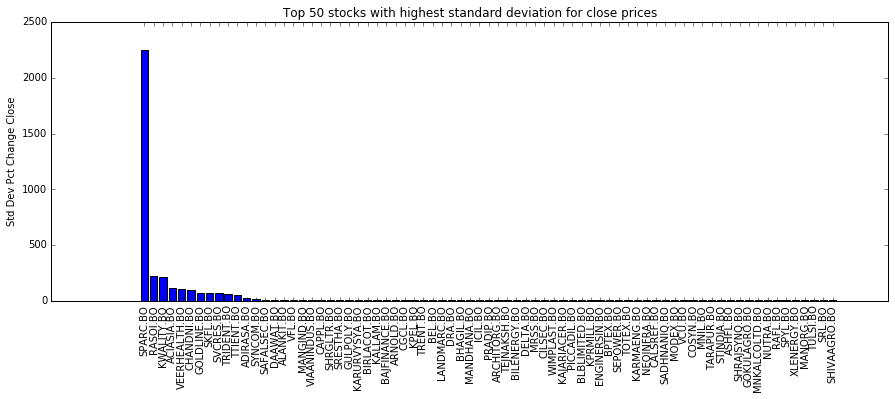

In [24]:
all_data = all_data.sort_values(by=['Std Dev Pct Change Close'], ascending=False)
top_data = all_data[:75]

plt.figure(figsize=(15,5))
plt.bar(range(0, len(top_data['Std Dev Pct Change Close'])), top_data['Std Dev Pct Change Close'], align='center')
plt.xticks(range(0, len(top_data['Std Dev Pct Change Close'])), top_data['Symbol'])
plt.xticks(rotation=90)
plt.ylabel('Std Dev Pct Change Close')
plt.title('Top 50 stocks with highest standard deviation for close prices')
plt.show()